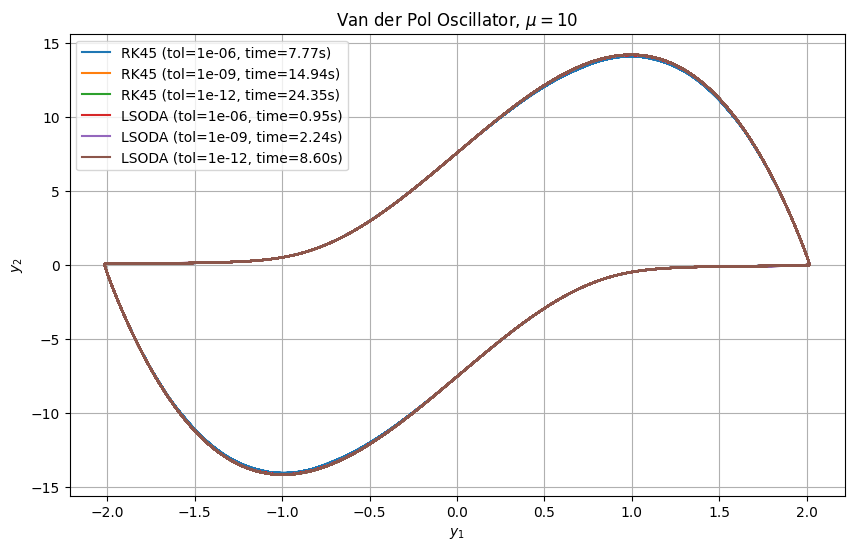

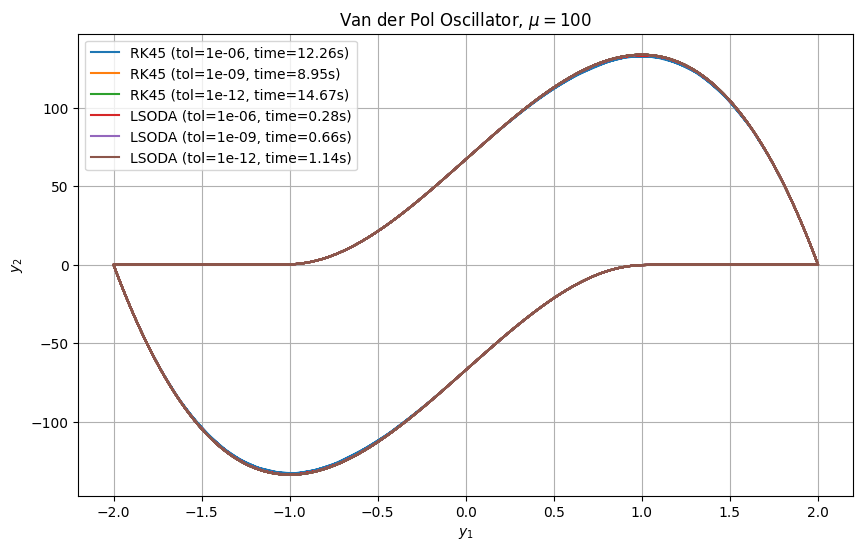

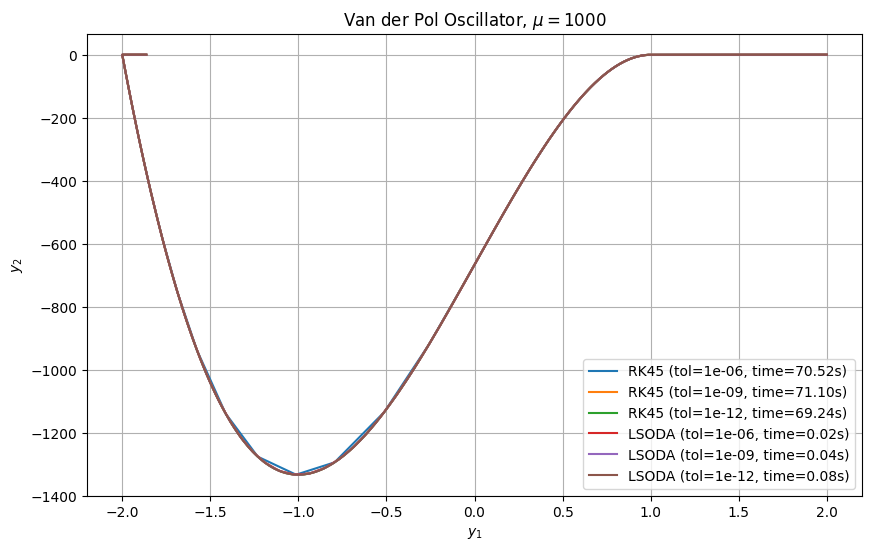

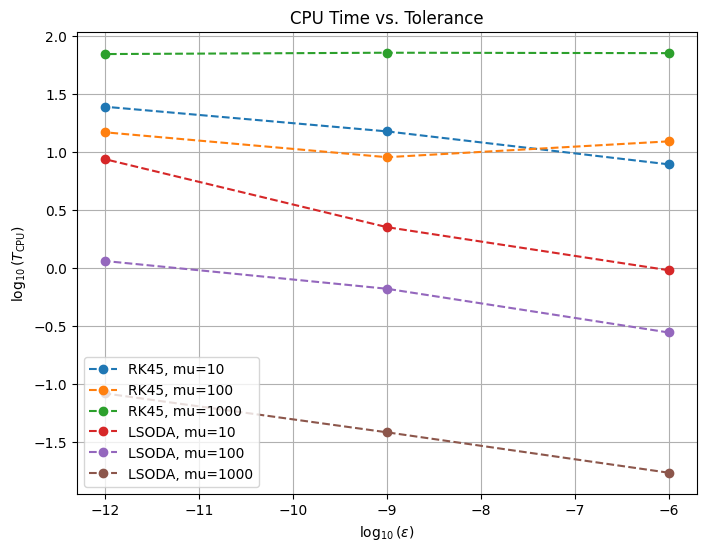

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
import time

# Problem 1b

def van_der_pol(t, y, mu):
    y1, y2 = y
    dydt = [y2, mu * (1 - y1**2) * y2 - y1]
    return dydt

mu_values = [10, 100, 1000]
t_max = 1000
t_span = (0, t_max)
y0 = [2, 0]
tolerances = [1e-6, 1e-9, 1e-12]

solvers = {"RK45": "RK45", "LSODA": "LSODA"}

cpu_times = []

for mu in mu_values:
    plt.figure(figsize=(10, 6))

    for solver_name, solver in solvers.items():
        for tol in tolerances:
            start_time = time.time()

            sol = solve_ivp(van_der_pol, t_span, y0, method=solver, args=(mu,),atol=tol, rtol=tol, dense_output=True)

            end_time = time.time()
            cpu_time = end_time - start_time

            cpu_times.append([mu, solver, tol, cpu_time])

            plt.plot(sol.y[0], sol.y[1], label=f"{solver} (tol={tol}, time={cpu_time:.2f}s)")

    plt.xlabel("$y_1$")
    plt.ylabel("$y_2$")
    plt.title(f"Van der Pol Oscillator, $\mu = {mu}$")
    plt.legend()
    plt.grid()
    plt.show()

df = pd.DataFrame(cpu_times, columns=["mu", "Solver", "Tolerance", "CPU Time"])

plt.figure(figsize=(8,6))
for solver_name in solvers.keys():
    for mu in mu_values:
        subset = df[(df["Solver"] == solver_name) & (df["mu"] == mu)]
        plt.plot(np.log10(subset["Tolerance"]), np.log10(subset["CPU Time"]), marker="o", linestyle="--", label=f"{solver_name}, mu={mu}")

plt.xlabel(r"$\log_{10}(\epsilon)$")
plt.ylabel(r"$\log_{10}(T_{\text{CPU}})$")
plt.title("CPU Time vs. Tolerance")
plt.legend()
plt.grid()
plt.show()


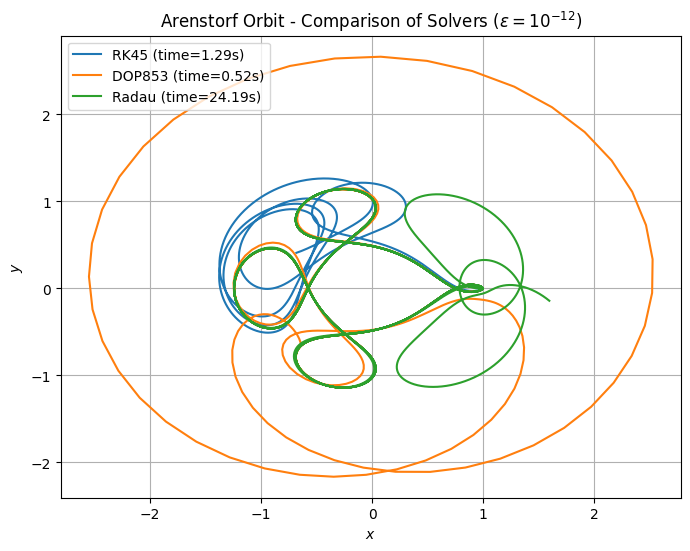


CPU Time Comparison:
Solver  CPU Time (s)
  RK45      1.289352
DOP853      0.515893
 Radau     24.187582


In [2]:
# 1c
def arenstorf_orbit(t, Y, mu=0.012277471):
    x, y, x_prime, y_prime = Y
    r1 = np.sqrt((x + mu)**2 + y**2)
    r2 = np.sqrt((x - 1 + mu)**2 + y**2)

    x_double_prime = x + 2*y_prime - ((1 - mu) * (x + mu) / r1**3) - (mu * (x - 1 + mu) / r2**3)
    y_double_prime = y - 2*x_prime - ((1 - mu) * y / r1**3) - (mu * y / r2**3)

    return [x_prime, y_prime, x_double_prime, y_double_prime]

y0 = [0.994, 0, 0, -2.001585106379082522405]

T_max = 100
t_span = (0, T_max)

solvers = {"RK45": "RK45", "DOP853": "DOP853", "Radau": "Radau"}
tolerance = 1e-12

cpu_times = []

plt.figure(figsize=(8, 6))

for solver_name, solver in solvers.items():
    start_time = time.time()

    sol = solve_ivp(
        arenstorf_orbit, t_span, y0, method=solver,
        atol=tolerance, rtol=tolerance, dense_output=True
    )

    end_time = time.time()
    cpu_time = end_time - start_time
    cpu_times.append([solver_name, cpu_time])

    plt.plot(sol.y[0], sol.y[1], label=f"{solver} (time={cpu_time:.2f}s)")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Arenstorf Orbit - Comparison of Solvers ($\epsilon = 10^{-12}$)")
plt.legend()
plt.grid()
plt.show()

df_cpu = pd.DataFrame(cpu_times, columns=["Solver", "CPU Time (s)"])
print("\nCPU Time Comparison:")
print(df_cpu.to_string(index=False))


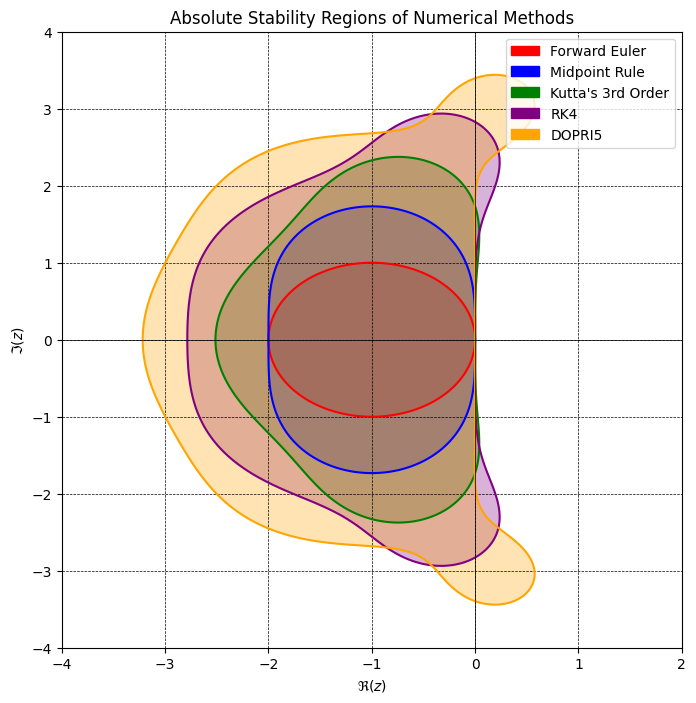

In [5]:
# Problem 2

nx, ny = 600, 600
x = np.linspace(-4, 2, nx)
y = np.linspace(-4, 4, ny)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

def forward_euler(z):
    return 1 + z

def midpoint_rule(z):
    return 1 + z + (z**2)/2

def kutta_3rd_order(z):
    return 1 + z + (z**2)/2 + (z**3)/6

def rk4(z):
    return 1 + z + (z**2)/2 + (z**3)/6 + (z**4)/24

def dopri5(z):
    return 1 + z + (z**2)/2 + (z**3)/6 + (z**4)/24 + (z**5)/120

methods = {
    "Forward Euler": forward_euler(Z),
    "Midpoint Rule": midpoint_rule(Z),
    "Kutta's 3rd Order": kutta_3rd_order(Z),
    "RK4": rk4(Z),
    "DOPRI5": dopri5(Z),
}

colors = ["red", "blue", "green", "purple", "orange"]

plt.figure(figsize=(8, 8))

for (method, R), color in zip(methods.items(), colors):
    abs_R = np.abs(R)

    plt.contourf(X, Y, abs_R, levels=[0, 1], colors=[color], alpha=0.3)

    plt.contour(X, Y, abs_R, levels=[1], colors=color, linewidths=1.5)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel(r"$\Re(z)$")
plt.ylabel(r"$\Im(z)$")
plt.title("Absolute Stability Regions of Numerical Methods")

from matplotlib.patches import Patch
legend_patches = [Patch(color=color, label=method) for method, color in zip(methods.keys(), colors)]
plt.legend(handles=legend_patches, loc="upper right")

plt.grid(color='k', linestyle='--', linewidth=0.5)
plt.show()
